# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#get info through APIs
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_info = requests.get(query_url + city)
weather_json = weather_info.json()
print(weather_json)


{'coord': {'lon': -46.0333, 'lat': 60.7167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 13.1, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 988, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1613797861, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1613817014, 'sunset': 1613851547}, 'timezone': -10800, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}


In [11]:
print(requests.get(query_url + city))

<Response [200]>


In [12]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
process_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & get Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {process_record} | {city_record}")
        
       
        process_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue


print(f"-------------------------------")
print(f"Finished Getting Data")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | North Bend
Processing Record 2 | Tiksi
Processing Record 3 | East London
Processing Record 4 | São Filipe
Processing Record 5 | Jamestown
Processing Record 6 | Provideniya
Processing Record 7 | Lucapa
Processing Record 8 | Puerto Ayora
Processing Record 9 | Nikolskoye
Processing Record 10 | Albany
Processing Record 11 | Ushuaia
Processing Record 12 | Kapaa
Processing Record 13 | Rikitea
Processing Record 14 | Longyearbyen
Processing Record 15 | Atuona
Processing Record 16 | Aksu
Processing Record 17 | Lunino
Processing Record 18 | Haines Junction
Processing Record 19 | La Cumbre
Processing Record 20 | Sandwick
Processing Record 21 | Cherskiy
Processing Record 22 | Vila Franca do Campo
Processing Record 23 | Butaritari
Processing Record 24 | Hadgāon
Processing Record 25 | Ostrovnoy
Processing Record 26 | Faanui
Processing Record 27 | Shaowu
Processing Record 28 | Bluff
Processing Record 29 | Saldanha
Processi

Processing Record 224 | Bayan
Processing Record 225 | Krasnogorsk
Processing Record 226 | Qaqortoq
Processing Record 227 | Shenjiamen
Processing Record 228 | Samur
City not found. Skipping...
Processing Record 229 | Rawson
Processing Record 230 | Kununurra
Processing Record 231 | Karpathos
Processing Record 232 | Walvis Bay
Processing Record 233 | Thetford Mines
Processing Record 234 | Bhubaneswar
Processing Record 235 | Theunissen
Processing Record 236 | Jinka
Processing Record 237 | Taltal
Processing Record 238 | Padang
Processing Record 239 | Abu Samrah
Processing Record 240 | Batticaloa
Processing Record 241 | Somotillo
Processing Record 242 | Broken Hill
Processing Record 243 | Sambava
Processing Record 244 | Meadow Lake
City not found. Skipping...
Processing Record 245 | Camaná
City not found. Skipping...
Processing Record 246 | Khatanga
Processing Record 247 | Tuatapere
Processing Record 248 | Marabu
City not found. Skipping...
Processing Record 249 | Vanderhoof
Processing Recor

Processing Record 452 | Stráž pod Ralskem
Processing Record 453 | Montluçon
Processing Record 454 | Ixtapa
Processing Record 455 | Mendi
Processing Record 456 | Loreto
Processing Record 457 | Katunino
Processing Record 458 | Akdepe
City not found. Skipping...
Processing Record 459 | Copala
Processing Record 460 | Xining
Processing Record 461 | New Glasgow
Processing Record 462 | Cayenne
Processing Record 463 | Lishu
Processing Record 464 | Al Bardīyah
Processing Record 465 | Ankang
Processing Record 466 | Sørland
Processing Record 467 | Acapulco de Juárez
Processing Record 468 | Sergeevka
Processing Record 469 | Gijang
Processing Record 470 | Namatanai
Processing Record 471 | Auki
Processing Record 472 | Le Port
Processing Record 473 | Sanguéya
Processing Record 474 | Nelson Bay
City not found. Skipping...
Processing Record 475 | Berezovyy
Processing Record 476 | Manaus
Processing Record 477 | Linxia Chengguanzhen
Processing Record 478 | Vao
Processing Record 479 | Livramento
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
   }

weather_info = pd.DataFrame(weather_dict)
# weather_info.count()

In [14]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Bend,43.4065,-124.2243,42.80,87,90,9.22,US,1613798030
1,Tiksi,71.6872,128.8694,-29.81,85,98,2.55,RU,1613797862
2,East London,-33.0153,27.9116,69.80,88,40,12.66,ZA,1613798037
3,São Filipe,14.8961,-24.4956,69.28,75,11,8.52,CV,1613798041
4,Jamestown,42.0970,-79.2353,18.00,79,90,14.97,US,1613797578


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,22.552116,17.326045,48.469364,72.458182,52.174545,7.824000,1.613798e+09
std,32.648978,91.064994,32.589559,19.959181,39.331695,5.680818,3.229757e+02
min,-54.800000,-175.200000,-34.600000,10.000000,0.000000,0.290000,1.613798e+09
25%,-3.275450,-62.423575,27.372500,63.000000,8.000000,3.490000,1.613798e+09
50%,28.579250,24.390750,59.000000,76.500000,55.500000,6.240000,1.613799e+09
75%,49.853350,95.926925,74.877500,87.000000,90.000000,10.652500,1.613799e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,31.320000,1.613799e+09


In [16]:
# Max Humidity 100. Nothing to remove.

In [17]:
# Save city data into a csv file
weather_info.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

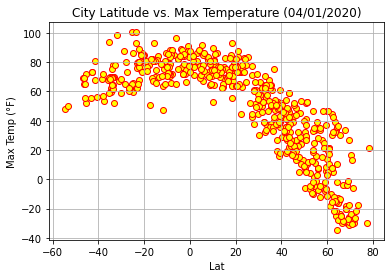

In [18]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], facecolors="yellow", marker="o", edgecolor="red")

# Graph Labels
plt.title("City Latitude vs. Max Temperature (04/01/2020)")
plt.ylabel("Max Temp (°F)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Temperature Plot.png")

# Show Plot
plt.show()

# Latitude vs. Temperature Plot Explanation

The plot is analyzing temperatures across increasing latitudes. This data set is showing that the higher the latitude the lower the temperatire.

## Latitude vs. Humidity Plot

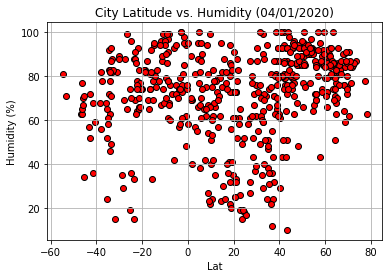

In [19]:

# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Humidity"], facecolors="red", marker="o", edgecolor="black")

# Graph Labels
plt.title("City Latitude vs. Humidity (04/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show Plot
plt.show()

# Latitude vs. Humidity Plot Explanation

The plot is analyzing humidity across increasing latitudes. 

## Latitude vs. Cloudiness Plot

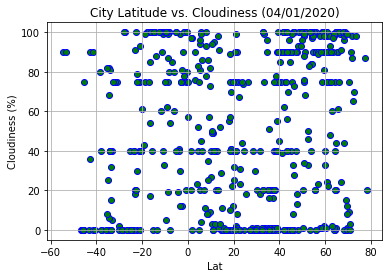

In [20]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], facecolors="green", marker="o", edgecolor="blue")

# Graph Labels
plt.title("City Latitude vs. Cloudiness (04/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show Plot
plt.show()


# Latitude vs. Cloudiness Plot Explanation

The plot is analyzing cloudiness across increasing latitudes. 

## Latitude vs. Wind Speed Plot

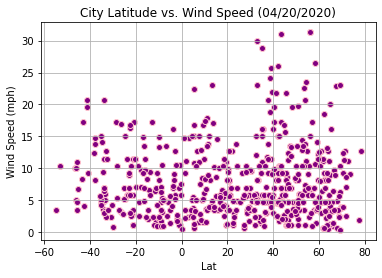

In [21]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], facecolors="purple", marker="o", edgecolor="pink")

# Graph Labels
plt.title("City Latitude vs. Wind Speed (04/20/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_info.loc[weather_info["Lat"] > 0]
southern_hemisphere = weather_info.loc[weather_info["Lat"] < 0]
                                      
def linear_agression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.88


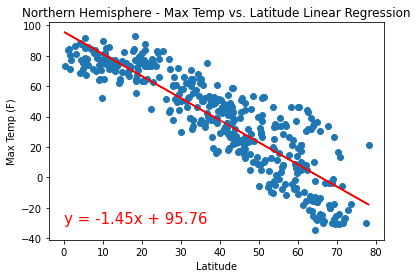

In [23]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, -30)

# Plot Labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Explanation

There is a strong negative correlation between latitude and high temperatures in the northern hemisphere

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.48


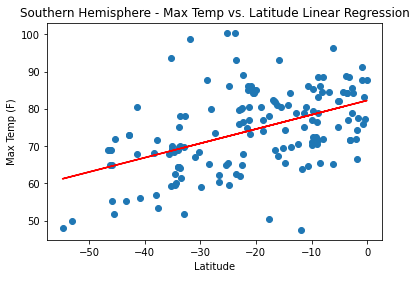

In [24]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -55, 35)

# Plot Labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Explanation

There is a weak positive correlation between latitude and high temperatures in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.39


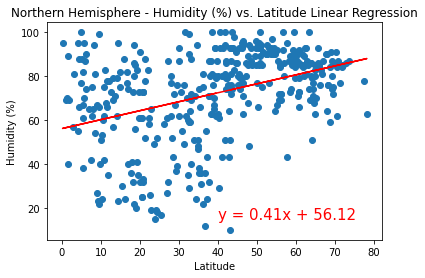

In [25]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

# Plot Labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Explanation

There is a weak positive correlation between latitude and high temperatures in the southern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.28


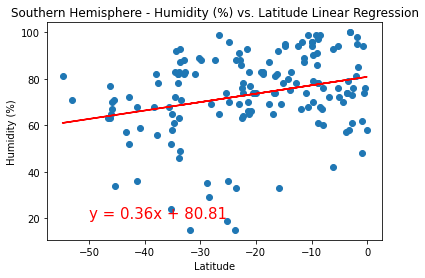

In [27]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 20)

# Plot Labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Explanation

There is a weak positive correlation between latitude and high temperatures in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.28


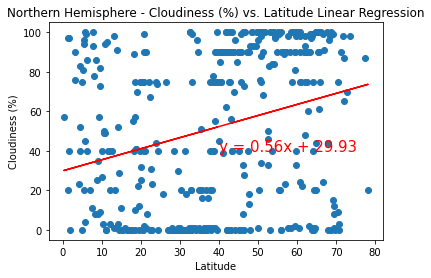

In [28]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation,40,40)

# Plot Labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Iamge
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Explanation

There is a weak positive correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.44


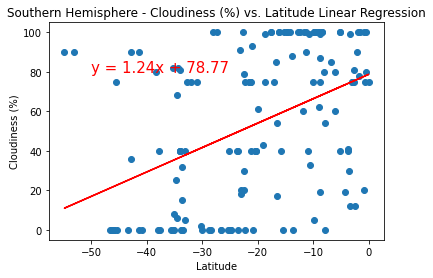

In [29]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 80)

# Plot Labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Explanation

There is a weak positive correlation between latitude and cloudiness in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.02


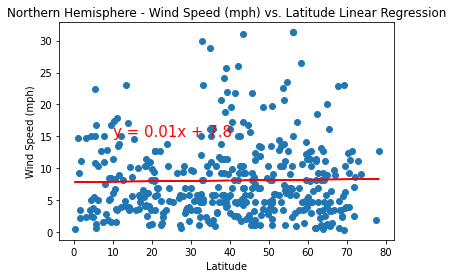

In [31]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 10, 15)

# Plot Labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot Explanation

There is a very weak positive correlation between latitude and wind speed (mph) in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.23


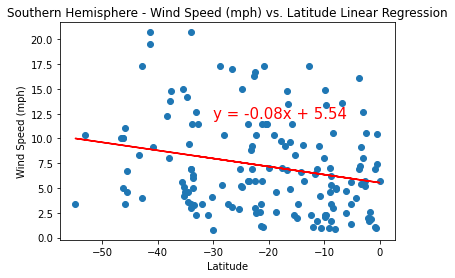

In [32]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 12)

# Plot Labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot Explanation


There is a weak negative correlation between latitude and wind speed (mph) in the southern hemisphere.